# Figures for ReadMe


In [1]:
# Standard library imports
import datetime
import os
from collections import deque
import time

# Third-party imports
import matplotlib.pyplot as plt
import numpy as np
import optuna
import pandas as pd
import seaborn as sns
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from collections import defaultdict
from joblib import Parallel, delayed

import sqlite3
import sys
import time
import math
#import tqdm
from tqdm.auto import tqdm
import datetime
import os
import pickle
from pathlib import Path

from glicko2 import Player
import multiprocessing
# from sklearn.model_selection import train_test_split


from tqdm import tqdm

if os.path.exists('/workspace/data_2'):
    # Load the dictionary of DataFrames from the pickle
    data_path = '/workspace/data_2/'
else:
    data_path = '../data/'
    
# if torch.cuda.is_available() == False:
#     RuntimeError("GPU detected: False")
#     print("GPU detected: False")
# else:
#     device = torch.device("cuda")
#     print("The GPU is detected.")



### Load Data

In [2]:
dataset_df = pd.read_pickle(data_path + 'dataset_full.pkl')
tournament_df = pd.read_pickle(data_path + 'top_8_tournament_previous_sets_and_results_with_winners_df.pkl')

Print out the columns using a loop for ease of reading.

In [3]:
for i, col in enumerate(dataset_df.columns):
    print(i, col)


0 key_x
1 game
2 tournament_key
3 winner_id
4 loser_id
5 p1_id
6 p2_id
7 p1_score
8 p2_score
9 valid_score
10 best_of
11 location_names
12 bracket_name
13 bracket_order
14 set_order
15 game_data
16 top_8
17 top_8_location_names
18 valid_top_8_bracket
19 top_8_bracket_location_names
20 major
21 key_y
22 start
23 end
24 start_week
25 p1_characters
26 p2_characters
27 p1_consistent
28 p2_consistent
29 matchup_strings
30 end_week
31 players_have_history
32 (p1/p2)_sorted
33 (p1/p2)_was_sorted
34 results_sorted
35 results
36 matchup_1
37 matchup_2
38 matchup_3
39 matchup_4
40 matchup_5
41 matchup_6
42 matchup_7
43 matchup_8
44 matchup_9
45 matchup_10
46 winner
47 p1_default_elo
48 p2_default_elo
49 p1_default_rd
50 p2_default_rd
51 p1_default_updates
52 p2_default_updates
53 start_index
54 start_date
55 p1_fox_count
56 p1_falco_count
57 p1_marth_count
58 p1_sheik_count
59 p1_captainfalcon_count
60 p1_jigglypuff_count
61 p1_peach_count
62 p1_luigi_count
63 p1_samus_count
64 p1_ganondorf_coun

In [4]:
for i, col in enumerate(tournament_df.columns):
    print(i, col)

0 game
1 key
2 cleaned_name
3 source
4 tournament_name
5 tournament_event
6 season
7 rank
8 start
9 end
10 country
11 state
12 city
13 entrants
14 placings
15 losses
16 bracket_types
17 online
18 lat
19 lng
20 LN_A_p1
21 LN_A_p2
22 LN_B_p1
23 LN_B_p2
24 WSF_A_p1
25 WSF_A_p2
26 WSF_B_p1
27 WSF_B_p2
28 LN_A_p1_non_top_8_sets
29 LN_A_p2_non_top_8_sets
30 LN_B_p1_non_top_8_sets
31 LN_B_p2_non_top_8_sets
32 WSF_A_p1_non_top_8_sets
33 WSF_A_p2_non_top_8_sets
34 WSF_B_p1_non_top_8_sets
35 WSF_B_p2_non_top_8_sets
36 winner_id
37 GFR
38 from_WF
39 from_winners_side
40 elo_rank_of_winner
41 top_overall_elo
42 top_overall_player
43 top_overall_player_is_winner
44 top_winners_elo
45 top_winners_player
46 top_winners_player_is_winner
47 top_winners_finals_elo
48 top_winners_finals_player
49 top_winners_finals_player_is_winner
50 winner_default_elo


In [5]:
tournament_df.head()

,game,key,cleaned_name,source,tournament_name,tournament_event,season,rank,start,end,...,top_overall_elo,top_overall_player,top_overall_player_is_winner,top_winners_elo,top_winners_player,top_winners_player_is_winner,top_winners_finals_elo,top_winners_finals_player,top_winners_finals_player_is_winner,winner_default_elo
0,melee,mdva-invitational-2017-(challonge-mirror),MDVA Invitational 2017 (Challonge Mirror),challonge,https://challonge.com/mdva_invitational_2017,,17,,2017-11-26 08:05:11,2017-11-26 08:48:09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,melee,s@sh7,S@SH7,challonge,https://challonge.com/sash7,,17,,2017-06-13 10:27:01,2017-06-13 10:27:01,...,2059.466548,1008,False,2059.466548,1008,False,1500.0,kjh,False,1500.0
2,melee,slippi-champions-league-week-1__melee-singles,Slippi Champions League Week 1,pgstats,slippi-champions-league-week-1,melee-singles,20,,2020-10-11 14:00:00,2020-10-11 14:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,melee,slippi-champions-league-week-2__melee-singles,Slippi Champions League Week 2,pgstats,slippi-champions-league-week-2,melee-singles,20,,2020-10-18 14:00:00,2020-10-18 14:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,melee,slippi-champions-league-week-3__melee-singles,Slippi Champions League Week 3,pgstats,slippi-champions-league-week-3,melee-singles,20,,2020-10-25 14:00:00,2020-10-25 14:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Histogram of all ELO
Histogram of the ELO of all sets played in 2023

In [6]:
sets_2023_df = dataset_df[(dataset_df['start'] > datetime.datetime(2023, 1, 1)) & (dataset_df['start'] < datetime.datetime(2024, 1, 1))]


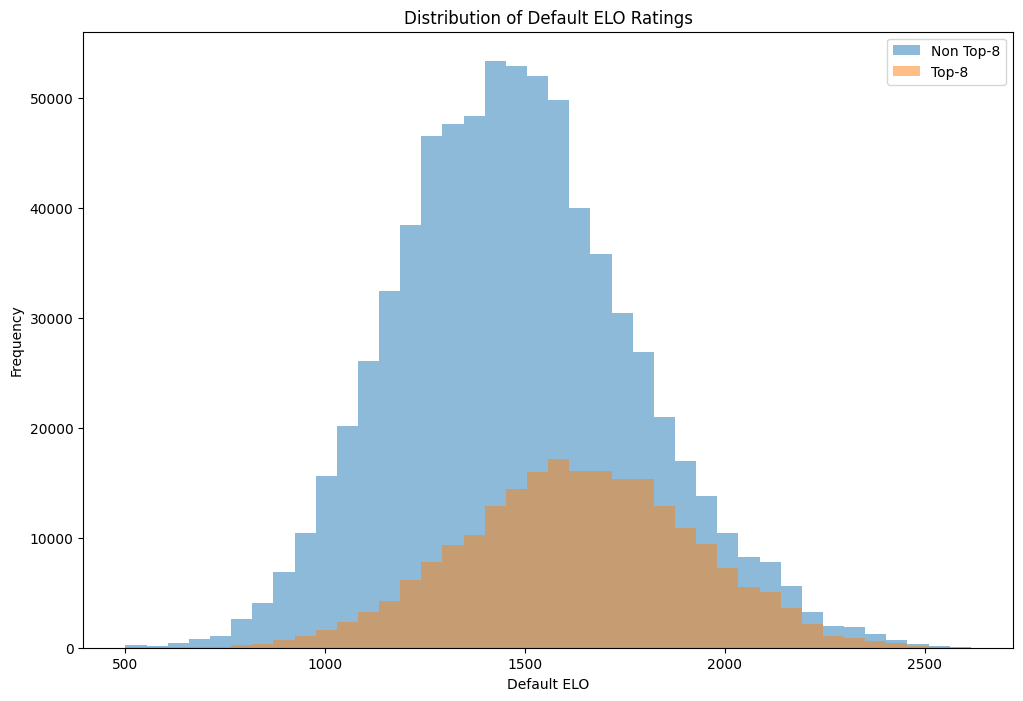

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract ELO values for non-top-8 players
p1_default_elo_non_top_8 = sets_2023_df[sets_2023_df['top_8'] == False]['p1_default_elo']
p2_default_elo_non_top_8 = sets_2023_df[sets_2023_df['top_8'] == False]['p2_default_elo']
default_elo_non_top_8 = pd.concat([p1_default_elo_non_top_8, p2_default_elo_non_top_8])
default_elo_non_top_8 = default_elo_non_top_8[default_elo_non_top_8 != 1500]

# Extract ELO values for top-8 players
p1_default_elo_top_8 = sets_2023_df[sets_2023_df['top_8'] == True]['p1_default_elo']
p2_default_elo_top_8 = sets_2023_df[sets_2023_df['top_8'] == True]['p2_default_elo']
default_elo_top_8 = pd.concat([p1_default_elo_top_8, p2_default_elo_top_8])
default_elo_top_8 = default_elo_top_8[default_elo_top_8 != 1500]



# Calculate the min and max values for binning
elo_min = min(default_elo_non_top_8.min(), default_elo_top_8.min())
elo_max = max(default_elo_non_top_8.max(), default_elo_top_8.max())

# Plot histograms
plt.figure(figsize=(12, 8), dpi=100)
plt.hist(default_elo_non_top_8, bins=40, range=(elo_min, elo_max), alpha=0.5, label="Non Top-8")
plt.hist(default_elo_top_8, bins=40, range=(elo_min, elo_max), alpha=0.5, label="Top-8")

plt.xlabel("Default ELO")
plt.ylabel("Frequency")
plt.title("Distribution of Default ELO Ratings")
plt.legend()
plt.show()

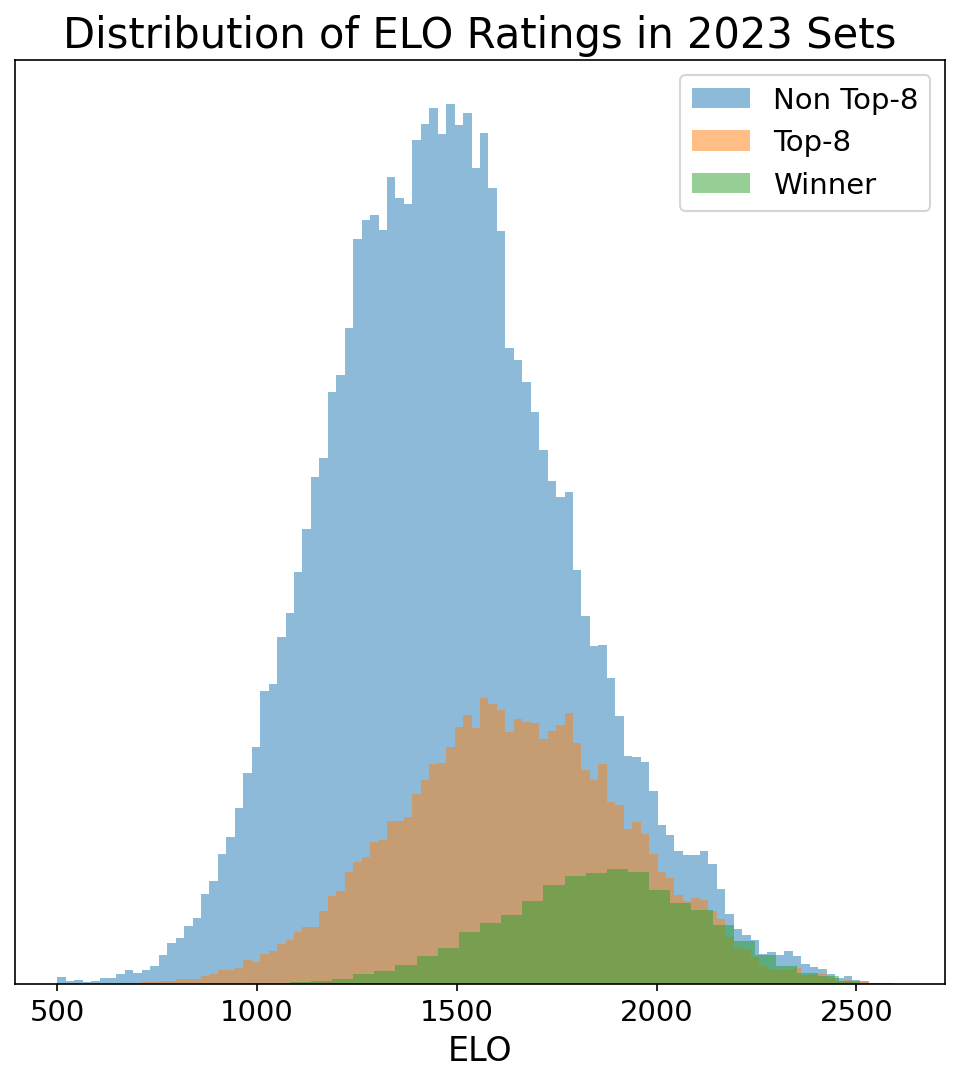

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract ELO values for non-top-8 players
p1_default_elo_non_top_8 = sets_2023_df[sets_2023_df['top_8'] == False]['p1_default_elo']
p2_default_elo_non_top_8 = sets_2023_df[sets_2023_df['top_8'] == False]['p2_default_elo']
default_elo_non_top_8 = pd.concat([p1_default_elo_non_top_8, p2_default_elo_non_top_8])
default_elo_non_top_8 = default_elo_non_top_8[default_elo_non_top_8 != 1500]

# Extract ELO values for top-8 players
p1_default_elo_top_8 = sets_2023_df[sets_2023_df['top_8'] == True]['p1_default_elo']
p2_default_elo_top_8 = sets_2023_df[sets_2023_df['top_8'] == True]['p2_default_elo']
default_elo_top_8 = pd.concat([p1_default_elo_top_8, p2_default_elo_top_8])
default_elo_top_8 = default_elo_top_8[default_elo_top_8 != 1500]

# # Identify tournaments with 'GFR'
# GFR_tournament_keys = sets_2023_df.loc[(sets_2023_df['top_8_location_names'] == 'GFR'), 'tournament_key'].copy()

# # Filter 'GF' tournaments that do not have a corresponding 'GFR'
# GF_tournament_results_df = sets_2023_df.loc[
#     (sets_2023_df['top_8_location_names'] == 'GF') & (~sets_2023_df['tournament_key'].isin(GFR_tournament_keys)),
#     ['winner_id', 'p1_id', 'p2_id', 'p1_default_elo', 'p2_default_elo']
# ]

# # Filter 'GFR' tournament results
# GFR_tournament_results_df = sets_2023_df.loc[
#     sets_2023_df['top_8_bracket_location_names'] == 'GFR',
#     ['winner_id', 'p1_id', 'p2_id', 'p1_default_elo', 'p2_default_elo']
# ]

# last_set = pd.concat([GF_tournament_results_df, GFR_tournament_results_df]).copy()

# last_set['winner_default_elo'] = last_set['p1_default_elo']
# last_set.loc[last_set['winner_id']==last_set['p2_id'],'winner_default_elo'] = last_set['p2_default_elo']


winner_elo= tournament_df[tournament_df['winner_default_elo']!=1500.0]['winner_default_elo'].dropna().values


# Calculate the min and max values for binning
elo_min = min(default_elo_non_top_8.min(), default_elo_top_8.min())
elo_max = max(default_elo_non_top_8.max(), default_elo_top_8.max())

# Plot histograms
plt.figure(figsize=(8, 8), dpi=150)
bins = 100
plt.hist(default_elo_non_top_8, bins=bins, range=(elo_min, elo_max), alpha=0.5, label="Non Top-8")
plt.hist(default_elo_top_8, bins=bins, range=(elo_min, elo_max), alpha=0.5, label="Top-8")
# plt.hist(last_set['winner_default_elo'], bins=40, range=(elo_min, elo_max), alpha=0.5, label="Winner")
plt.hist(winner_elo, bins=40, range=(elo_min, elo_max), alpha=0.5, label="Winner")
plt.xlabel("ELO", fontsize=16)
plt.title("Distribution of ELO Ratings in 2023 Sets", fontsize=20)
plt.xticks(fontsize=14)
plt.legend(fontsize=14)

# Remove y-axis ticks and label
plt.gca().axes.yaxis.set_visible(False)

plt.show()


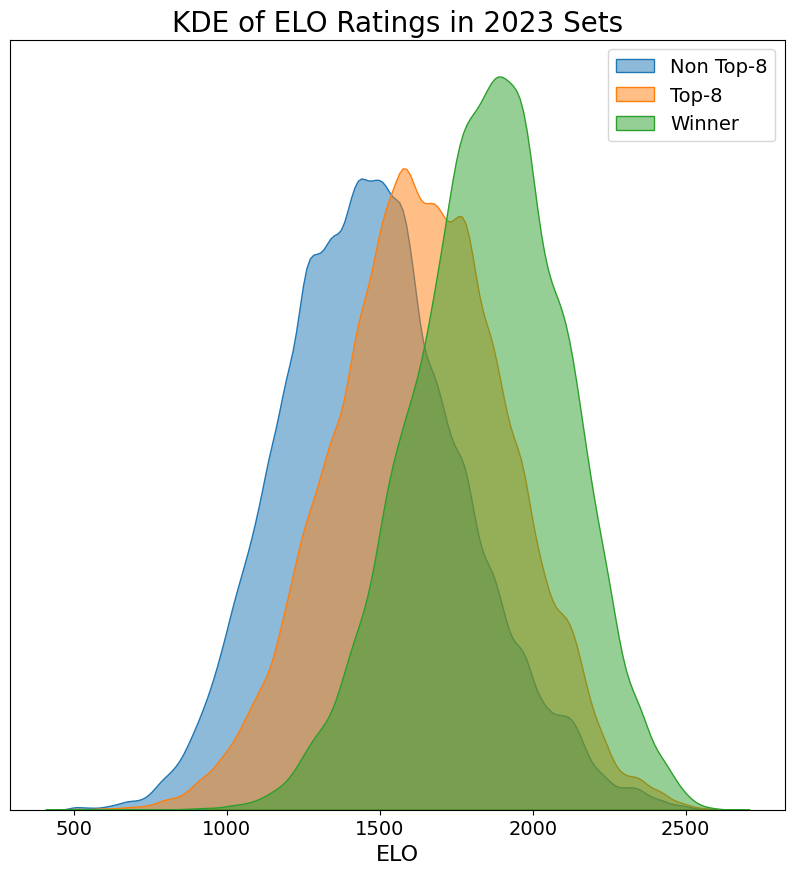

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract ELO values for non-top-8 players
p1_default_elo_non_top_8 = sets_2023_df[sets_2023_df['top_8'] == False]['p1_default_elo']
p2_default_elo_non_top_8 = sets_2023_df[sets_2023_df['top_8'] == False]['p2_default_elo']
default_elo_non_top_8 = pd.concat([p1_default_elo_non_top_8, p2_default_elo_non_top_8])
default_elo_non_top_8 = default_elo_non_top_8[default_elo_non_top_8 != 1500]

# Extract ELO values for top-8 players
p1_default_elo_top_8 = sets_2023_df[sets_2023_df['top_8'] == True]['p1_default_elo']
p2_default_elo_top_8 = sets_2023_df[sets_2023_df['top_8'] == True]['p2_default_elo']
default_elo_top_8 = pd.concat([p1_default_elo_top_8, p2_default_elo_top_8])
default_elo_top_8 = default_elo_top_8[default_elo_top_8 != 1500]

winner_elo= tournament_df[tournament_df['winner_default_elo']!=1500.0]['winner_default_elo'].dropna().values

# Create KDE plots
plt.figure(figsize=(10, 10), dpi=100)
sns.kdeplot(default_elo_non_top_8, label="Non Top-8", fill=True, alpha=0.5)
sns.kdeplot(default_elo_top_8, label="Top-8", fill=True, alpha=0.5)
sns.kdeplot(winner_elo, label="Winner", fill=True, alpha=0.5)

# Add labels and title
plt.xlabel("ELO", fontsize=16)
plt.title("KDE of ELO Ratings in 2023 Sets", fontsize=20)
plt.xticks(fontsize=14)
plt.legend(fontsize=14)

# Remove y-axis ticks and label
plt.gca().axes.yaxis.set_visible(False)

plt.show()


In [10]:
top_player_id = {
    'aMSa': '1021',
    'Cody': '19554',
    'Mang0': '1000',
    'Zain': '6126',
    'Armada': '6189',
    'Wizzrobe': '1028',
    'Mew2King': '1003',
    'PPMD': '1002',
    'Hungrybox': '1004',
    'Plup': '15990',
    'Axe': '16342'
}


In [11]:

default_elo = pd.read_pickle('/workspace/data/overall_players_ranking_new_weekly.pkl')
alt2_elo = pd.read_pickle('/workspace/data/char_vs_char_player_rankings_weekly_alt2.pkl')
alt3_elo = pd.read_pickle('/workspace/data/player_char_overall_rankings_weekly.pkl')

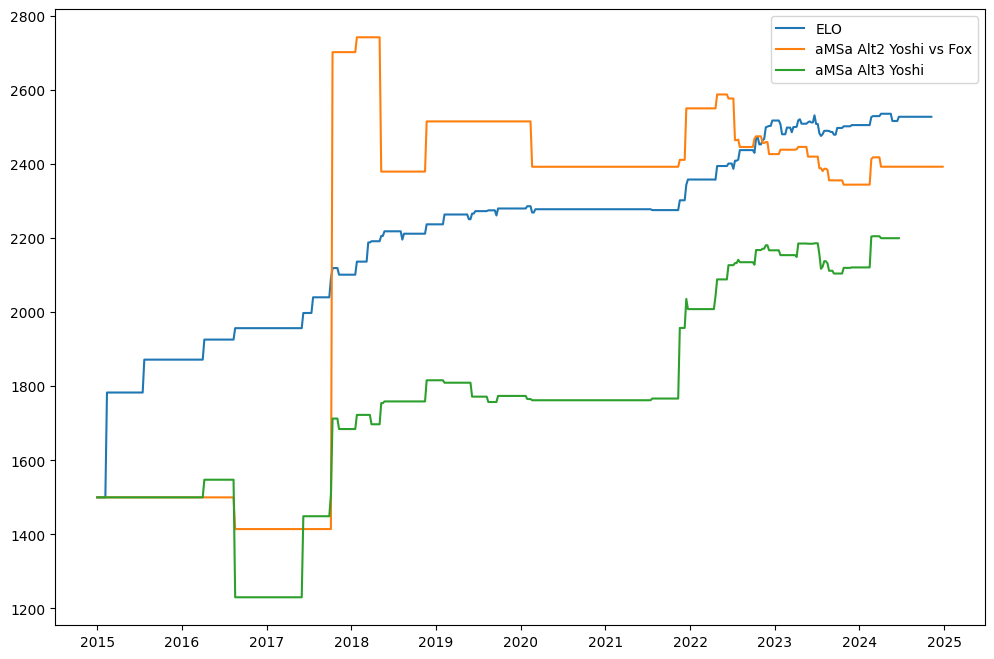

In [12]:



alt2_elo.columns
amsa_alt2 = alt2_elo[top_player_id['aMSa']+'/yoshi/fox'].values
amsa_alt3 = alt3_elo[top_player_id['aMSa']+'/yoshi'].values

plt.figure(figsize=(12,8),dpi=100)

index = default_elo.index.values
values = default_elo[top_player_id['aMSa']].values 
plt.plot(index, values, label='ELO')

index = alt2_elo.index.values
values = alt2_elo[top_player_id['aMSa']+'/yoshi/fox'].values
plt.plot(index, values, label='aMSa Alt2 Yoshi vs Fox')

index = alt3_elo.index.values
values = alt3_elo[top_player_id['aMSa']+'/yoshi'].values
plt.plot(index, values, label='aMSa Alt3 Yoshi')

plt.legend()
plt.show()

In [13]:
model = None
with open(data_path + 'single_set_model.pkl', 'rb') as f:
    model = pickle.load(f)
    
features = ['p1_default_elo', 'p2_default_elo', 'p1_default_rd', 'p2_default_rd',
       'p1_default_updates', 'p2_default_updates', 'matchup_1', 'matchup_2',
       'matchup_3', 'matchup_4', 'matchup_5', 'matchup_6', 'matchup_7',
       'matchup_8', 'matchup_9', 'matchup_10', 'p1_m1_usage', 'p2_m1_usage',
       'p1/m1/m1_alt2_elo', 'p1/m1/m1_alt2_rd', 'p1/m1/m1_alt2_updates',
       'p2/m1/m1_alt2_elo', 'p2/m1/m1_alt2_rd', 'p2/m1/m1_alt2_updates',
       'p1/m1_alt3_elo', 'p1/m1_alt3_rd', 'p1/m1_alt3_updates',
       'p2/m1_alt3_elo', 'p2/m1_alt3_rd', 'p2/m1_alt3_updates']

In [14]:
# Get feature importance for weight, gain, and cover
importance_weight = model.get_booster().get_score(importance_type='weight')
importance_gain = model.get_booster().get_score(importance_type='gain')
importance_cover = model.get_booster().get_score(importance_type='cover')

# Map importance to feature names and create a comprehensive DataFrame
importance_df = pd.DataFrame({
    'Feature': importance_weight.keys(),  # Map f0, f1, ... to feature names
    'Weight': [importance_weight.get(f, 0) for f in importance_weight.keys()],
    'Gain': [importance_gain.get(f, 0) for f in importance_weight.keys()],
    'Cover': [importance_cover.get(f, 0) for f in importance_weight.keys()]
}).sort_values(by='Weight', ascending=False)  # Sort by Weight (or choose another metric)

# Display the DataFrame
print(importance_df.to_string())

                  Feature   Weight        Gain          Cover
0          p1_default_elo  10373.0  507.666016   91008.890625
1          p2_default_elo  10176.0  314.507233  105940.679688
2           p1_default_rd   8454.0   31.984856   65013.984375
3           p2_default_rd   7928.0   29.541842   59007.781250
27         p2/m1_alt3_elo   5967.0   71.432182   36009.542969
21      p2/m1/m1_alt2_elo   5913.0   26.608749   40152.355469
18      p1/m1/m1_alt2_elo   5822.0   22.018339   31267.916016
24         p1/m1_alt3_elo   5747.0   49.184296   36572.023438
4      p1_default_updates   5711.0   36.024788   66281.140625
5      p2_default_updates   5557.0   36.878906   76256.656250
28          p2/m1_alt3_rd   4719.0   13.627356   16459.052734
25          p1/m1_alt3_rd   4697.0   14.672065   20901.507812
22       p2/m1/m1_alt2_rd   3254.0    9.970593   19000.917969
19       p1/m1/m1_alt2_rd   3046.0    9.435704   15267.255859
6               matchup_1   3023.0  107.537170  121342.843750
16      

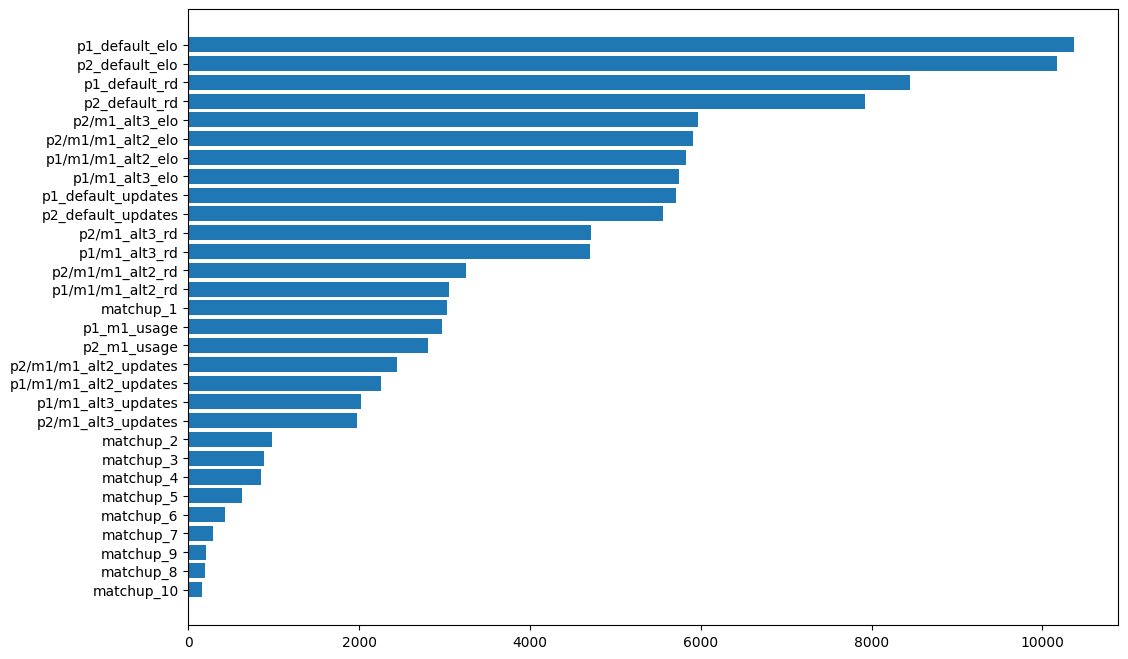

In [15]:
plt.figure(figsize=(12,8))

plt.barh(importance_df.sort_values(by='Weight', ascending=True)['Feature'],importance_df.sort_values(by='Weight', ascending=True)['Weight'])
plt.show()

In [16]:
had_winner = tournament_df[tournament_df['top_winners_player_is_winner'].notna()]

print(f"The top player in the winners semifinals won the tournament {had_winner['top_winners_player_is_winner'].sum()/had_winner.shape[0]:.2%} of the time.")
print(f"The winner came from losers side {(1-had_winner['from_winners_side']).sum()/had_winner.shape[0]:.2%} of the time.")
print(f"The winner of the tournament came from the losers final {(1-had_winner['from_WF']).sum()/had_winner.shape[0]:.2%} of the time.")
print(f"The top player in the winners semifinals won the tournament from losers {(had_winner['top_winners_player_is_winner'] & (1-had_winner['from_WF'])).sum()/had_winner.shape[0]:.2%}.")


The top player in the winners semifinals won the tournament 66.29% of the time.
The winner came from losers side 2.92% of the time.
The winner of the tournament came from the losers final 8.42% of the time.
The top player in the winners semifinals won the tournament from losers 2.77%.


In [17]:
mask = (had_winner['top_overall_player_is_winner']==True) & (had_winner['from_winners_side']==False)
print(f"Top player was in losers and won {mask.sum()/had_winner.shape[0]:.2%}")

Top player was in losers and won 1.33%


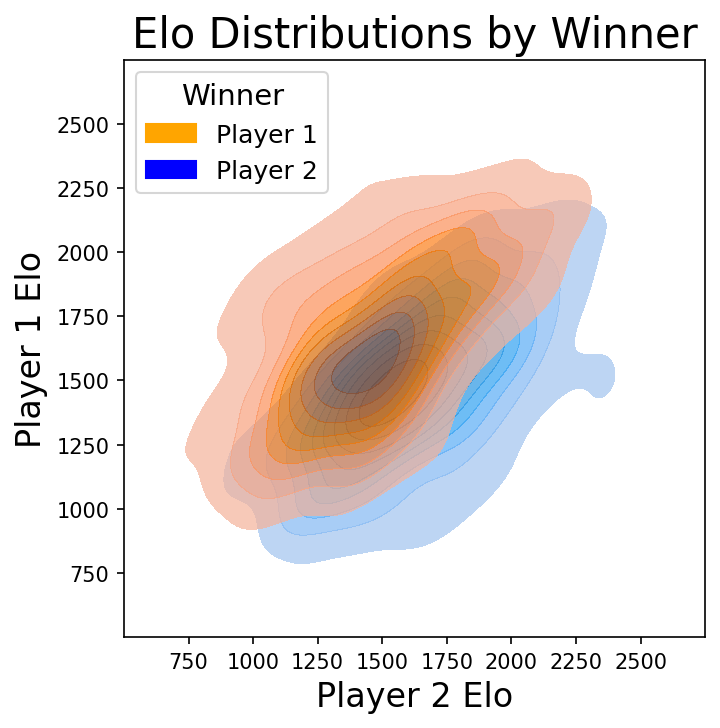

In [101]:
# Adjusting figure size
plt.figure(figsize=(5, 5), dpi=150)
# Filtering and sampling the dataset
dataset_p1_wins = dataset_df[
    (dataset_df['p1_default_elo'] != 1500) & (dataset_df['p2_default_elo'] != 1500) & (dataset_df['winner']==1)
].sample(300)

# Filtering and sampling the dataset
dataset_p2_wins = dataset_df[
    (dataset_df['p1_default_elo'] != 1500) & (dataset_df['p2_default_elo'] != 1500) & (dataset_df['winner']==0)
].sample(300)

# KDE plot
sns.kdeplot(
    data=dataset_p2_wins, 
    x='p2_default_elo', 
    y='p1_default_elo', 
    alpha=0.7, 
    fill=True,
    label='Player 2'
)

# KDE plot
sns.kdeplot(
    data=dataset_p1_wins, 
    x='p2_default_elo', 
    y='p1_default_elo', 
    alpha=0.7, 
    fill=True,
    label='Player 1'
)

plt.title("Elo Distributions by Winner", fontsize=20)
plt.xlabel("Player 2 Elo", fontsize=16)
plt.ylabel("Player 1 Elo", fontsize=16)

# Create a manual legend
legend_labels = [
    mpatches.Patch(color="orange", label="Player 1"),
    mpatches.Patch(color="blue", label="Player 2")

]
plt.legend(handles=legend_labels, title="Winner", fontsize=12, title_fontsize=14, loc='upper left')

# Adjusting plot limits
plt.xlim(500, 2750)
plt.ylim(500, 2750)

# Adjust x and y ticks to exclude 500 and 2750
plt.xticks(ticks=plt.xticks()[0][1:-1])
plt.yticks(ticks=plt.yticks()[0][1:-1])
# Showing the plot
plt.show()

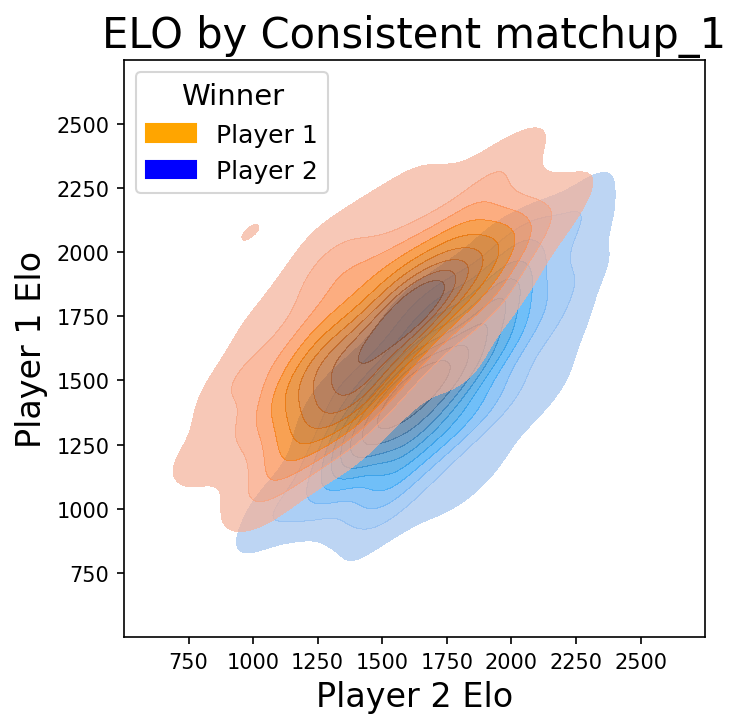

In [100]:
# Adjusting figure size
plt.figure(figsize=(5, 5), dpi=150)

# Filtering and sampling the dataset
dataset_p1_wins = dataset_df[
    (dataset_df['p1_default_elo'] != 1500) & (dataset_df['p2_default_elo'] != 1500) & (dataset_df['winner']==1) & (dataset_df['matchup_1']==1)
].sample(300)

# Filtering and sampling the dataset
dataset_p2_wins = dataset_df[
    (dataset_df['p1_default_elo'] != 1500) & (dataset_df['p2_default_elo'] != 1500) & (dataset_df['winner']==0) & (dataset_df['matchup_1']==0)
].sample(300)

# KDE plot
sns.kdeplot(
    data=dataset_p2_wins, 
    x='p2_default_elo', 
    y='p1_default_elo', 
    alpha=0.7, 
    fill=True,
    label='Player 2 wins'
)

# KDE plot
sns.kdeplot(
    data=dataset_p1_wins, 
    x='p2_default_elo', 
    y='p1_default_elo', 
    alpha=0.7, 
    fill=True,
    label='Player 1 wins'
)

plt.title(
"ELO by Consistent matchup_1", fontsize=20)
plt.xlabel("Player 2 Elo", fontsize=16)
plt.ylabel("Player 1 Elo", fontsize=16)

# Create a manual legend
legend_labels = [
    mpatches.Patch(color="orange", label="Player 1"),
    mpatches.Patch(color="blue", label="Player 2")

]
plt.legend(handles=legend_labels, title="Winner", fontsize=12, title_fontsize=14, loc='upper left')

# Adjusting plot limits
plt.xlim(500, 2750)
plt.ylim(500, 2750)

# Adjust x and y ticks to exclude 500 and 2750
plt.xticks(ticks=plt.xticks()[0][1:-1])
plt.yticks(ticks=plt.yticks()[0][1:-1])

# Showing the plot
plt.show()

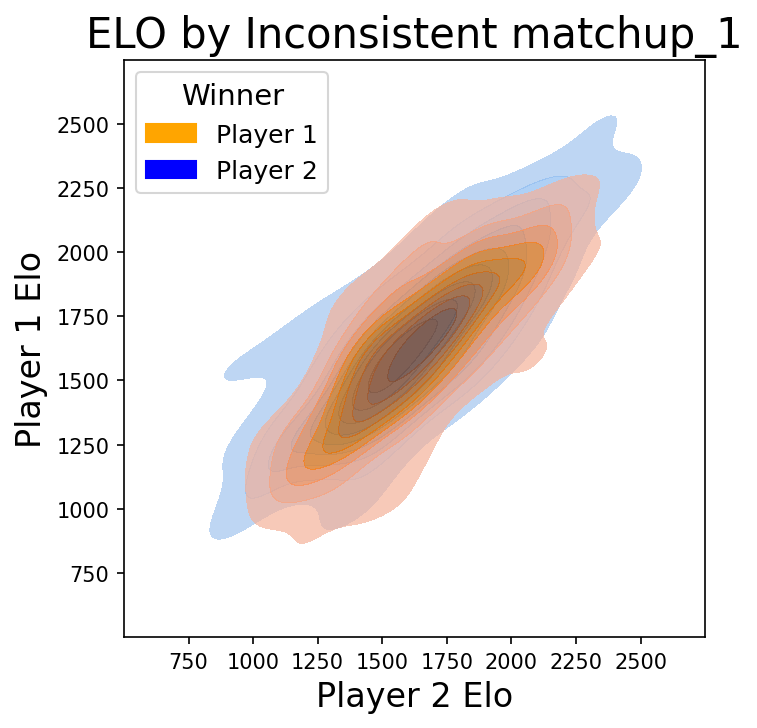

In [99]:
# Adjusting figure size
plt.figure(figsize=(5, 5), dpi=150)

# Filtering and sampling the dataset
dataset_p1_wins = dataset_df[
    (dataset_df['p1_default_elo'] != 1500) & (dataset_df['p2_default_elo'] != 1500) & (dataset_df['winner']==1) & (dataset_df['matchup_1']==0)
].sample(300)

# Filtering and sampling the dataset
dataset_p2_wins = dataset_df[
    (dataset_df['p1_default_elo'] != 1500) & (dataset_df['p2_default_elo'] != 1500) & (dataset_df['winner']==0) & (dataset_df['matchup_1']==1)
].sample(300)

# KDE plot
sns.kdeplot(
    data=dataset_p2_wins, 
    x='p2_default_elo', 
    y='p1_default_elo', 
    alpha=0.7, 
    fill=True,
    label='Player 2 wins'
)

# KDE plot
sns.kdeplot(
    data=dataset_p1_wins, 
    x='p2_default_elo', 
    y='p1_default_elo', 
    alpha=0.7, 
    fill=True,
    label='Player 1 wins'
)

plt.title(
"ELO by Inconsistent matchup_1", fontsize=20)
plt.xlabel("Player 2 Elo", fontsize=16)
plt.ylabel("Player 1 Elo", fontsize=16)

# Create a manual legend
legend_labels = [
    mpatches.Patch(color="orange", label="Player 1"),
    mpatches.Patch(color="blue", label="Player 2")

]
plt.legend(handles=legend_labels, title="Winner", fontsize=12, title_fontsize=14, loc='upper left')

# Adjusting plot limits
plt.xlim(500, 2750)
plt.ylim(500, 2750)

# Adjust x and y ticks to exclude 500 and 2750
plt.xticks(ticks=plt.xticks()[0][1:-1])
plt.yticks(ticks=plt.yticks()[0][1:-1])

# Showing the plot
plt.show()

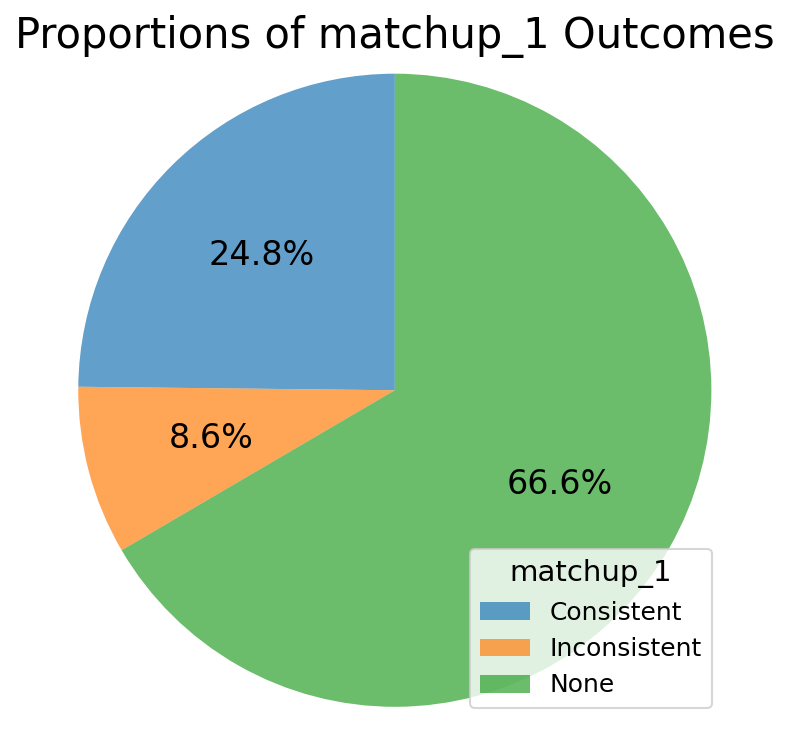

In [102]:
import matplotlib.pyplot as plt

# Initialize proportions and labels
proportions = []
labels = ['Consistent', 'Inconsistent', 'None']

# Calculate proportions
# Matchup_1 Consistent
dataset_p1_wins = dataset_df[(dataset_df['winner'] == 1) & (dataset_df['matchup_1'] == 1)]
dataset_p2_wins = dataset_df[(dataset_df['winner'] == 0) & (dataset_df['matchup_1'] == 0)]
proportions.append((dataset_p1_wins.shape[0] + dataset_p2_wins.shape[0]) / dataset_df.shape[0])

# Matchup_1 Inconsistent
dataset_p1_wins = dataset_df[(dataset_df['winner'] == 1) & (dataset_df['matchup_1'] == 0)]
dataset_p2_wins = dataset_df[(dataset_df['winner'] == 0) & (dataset_df['matchup_1'] == 1)]
proportions.append((dataset_p1_wins.shape[0] + dataset_p2_wins.shape[0]) / dataset_df.shape[0])

# No History
dataset_p1_wins = dataset_df[(dataset_df['winner'] == 1) & (dataset_df['matchup_1'] == 0.5)]
dataset_p2_wins = dataset_df[(dataset_df['winner'] == 0) & (dataset_df['matchup_1'] == 0.5)]
proportions.append((dataset_p1_wins.shape[0] + dataset_p2_wins.shape[0]) / dataset_df.shape[0])

# Plot the pie chart
plt.figure(figsize=(5, 5), dpi=150)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
wedges, _, autotexts = plt.pie(
    proportions, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors,
    radius=1.2
    
)

# Set alpha for each wedge
for wedge in wedges:
    wedge.set_alpha(0.7)



for autotext in autotexts:
    autotext.set_fontsize(16)  # Larger font size for percentages
    
# Add a legend
plt.legend(
    handles=wedges, 
    labels=labels, 
    title="matchup_1", 
    fontsize=12, 
    title_fontsize=14, 
    loc='lower right'  # Position legend outside the pie chart
)


# Add a title
plt.title('Proportions of matchup_1 Outcomes', fontsize=20)
plt.tight_layout()
# Display the chart
plt.show()


In [52]:

# Filtering and sampling the dataset
dataset_p1_wins = dataset_df[(dataset_df['winner']==1) & (dataset_df['matchup_1']==0)]

# Filtering and sampling the dataset
dataset_p2_wins = dataset_df[(dataset_df['winner']==0) & (dataset_df['matchup_1']==1)]

(dataset_p1_wins.shape[0]+dataset_p2_wins.shape[0])/dataset_df.shape[0]

0.08610055063042588

In [ ]:
/